In [70]:
from sklearn.datasets import load_diabetes

In [71]:
dataset = load_diabetes()

In [72]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [73]:
## Independent and dependent features
import pandas as pd

In [74]:
X = pd.DataFrame(dataset.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [75]:
y=dataset['target']

In [76]:
## train test split
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [77]:
## model training
from sklearn.tree import DecisionTreeRegressor

In [78]:
regressor = DecisionTreeRegressor()

In [79]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [80]:
y_pred = regressor.predict(x_test)

In [81]:
## Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-0.12336714349878664
64.24719101123596
7022.38202247191


In [82]:
## Correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.196083,0.202593,0.367479,0.238894,0.194840,-0.119524,0.228041,0.302274,0.345631
sex,0.196083,1.000000,0.088119,0.229459,0.010085,0.117818,-0.370008,0.301513,0.147678,0.213834
bmi,0.202593,0.088119,1.000000,0.378013,0.217977,0.238805,-0.391322,0.411254,0.432327,0.374699
bp,0.367479,0.229459,0.378013,1.000000,0.224559,0.159546,-0.193113,0.244140,0.399925,0.376167
s1,0.238894,0.010085,0.217977,0.224559,1.000000,0.880910,0.018819,0.548260,0.544285,0.309938
s2,0.194840,0.117818,0.238805,0.159546,0.880910,1.000000,-0.240253,0.661777,0.321811,0.278650
s3,-0.119524,-0.370008,-0.391322,-0.193113,0.018819,-0.240253,1.000000,-0.752319,-0.395944,-0.316024
s4,0.228041,0.301513,0.411254,0.244140,0.548260,0.661777,-0.752319,1.000000,0.624991,0.440174
s5,0.302274,0.147678,0.432327,0.399925,0.544285,0.321811,-0.395944,0.624991,1.000000,0.472258
s6,0.345631,0.213834,0.374699,0.376167,0.309938,0.278650,-0.316024,0.440174,0.472258,1.000000


In [83]:
## Heatmap
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

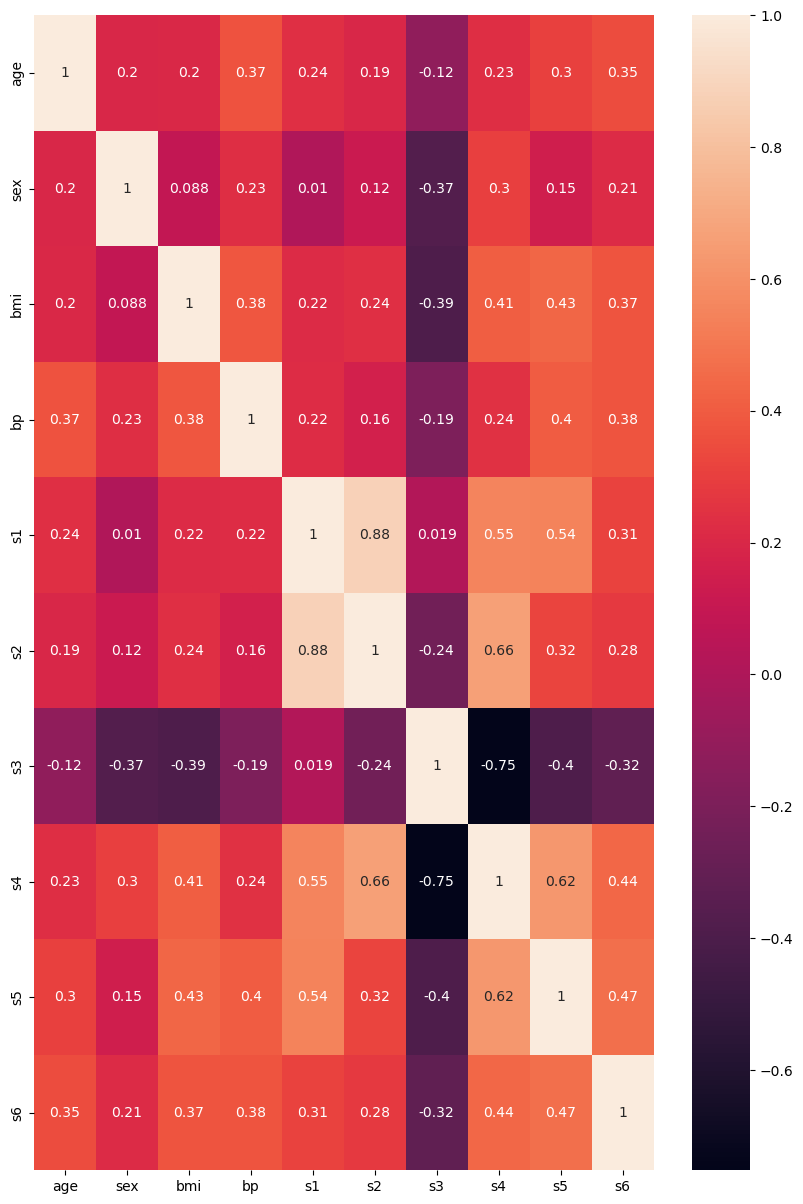

In [84]:
plt.figure(figsize=(10,15))
sns.heatmap(X_train.corr(), annot=True)

In [85]:
## Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

In [86]:
regression = DecisionTreeRegressor()


In [95]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter' : ["best", "random"],
    'max_depth': [1,2,3,4,5,10,15,20,25],
    'max_features' : ["auto","sqrt", "log2"]
}

In [96]:
grid = GridSearchCV(regression, param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [97]:
grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [98]:
grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt')

In [99]:
grid.best_score_

-4013.8415121445187

In [101]:
## Metrics
y_prred = grid.predict(x_test)

In [102]:
print(r2_score(y_test, y_prred))
print(mean_absolute_error(y_test, y_prred))
print(mean_squared_error(y_test, y_prred))

0.36697758995751084
50.138972688276944
3957.1436799006037


In [103]:
## Visualize the tree
regression = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt', splitter='random')

In [104]:
regression.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt', splitter='random')

[Text(0.5, 0.875, 'x[9] <= 0.034\nfriedman_mse = 5845.82\nsamples = 353\nvalue = 152.918'),
 Text(0.25, 0.625, 'x[7] <= -0.062\nfriedman_mse = 4737.389\nsamples = 277\nvalue = 137.347'),
 Text(0.125, 0.375, 'x[0] <= -0.013\nfriedman_mse = 1521.339\nsamples = 22\nvalue = 87.545'),
 Text(0.0625, 0.125, 'friedman_mse = 871.702\nsamples = 11\nvalue = 72.545'),
 Text(0.1875, 0.125, 'friedman_mse = 1720.975\nsamples = 11\nvalue = 102.545'),
 Text(0.375, 0.375, 'x[0] <= -0.095\nfriedman_mse = 4782.418\nsamples = 255\nvalue = 141.643'),
 Text(0.3125, 0.125, 'friedman_mse = 2538.914\nsamples = 9\nvalue = 127.556'),
 Text(0.4375, 0.125, 'friedman_mse = 4856.971\nsamples = 246\nvalue = 142.159'),
 Text(0.75, 0.625, 'x[8] <= 0.068\nfriedman_mse = 5781.115\nsamples = 76\nvalue = 209.671'),
 Text(0.625, 0.375, 'x[6] <= -0.001\nfriedman_mse = 6312.963\nsamples = 57\nvalue = 198.193'),
 Text(0.5625, 0.125, 'friedman_mse = 6060.832\nsamples = 43\nvalue = 212.651'),
 Text(0.6875, 0.125, 'friedman_mse = 

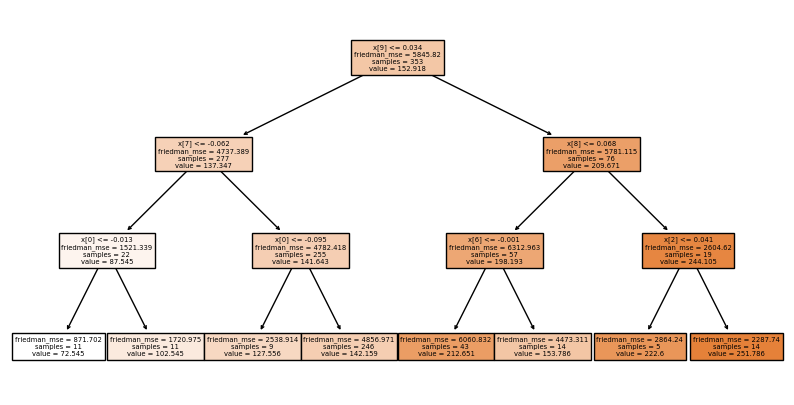

In [105]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(regression, filled=True)